# Time Series Diagnostics on Dengue Time-Series Data

In this section, we will perform Time-Series diagnostics such as Seasonal Decompose, Dickey-Fuller Tests, ACF and PACF plots to check for trends and stationarity of the Dengue Time-Series data.

## Importing the relevant packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt
%matplotlib inline

## Importing the Dengue Weather Google Data 

In [21]:
# Assuming your index is in a column called 'date'
dengue_weather_google = pd.read_csv('../../assets/dengue_weather_google.csv', index_col='date')

In [22]:
dengue_weather_google.head()

,number,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),...,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
date,,,,,,,,,,,,,,,,,,,,,
2014-01-06,436.0,31.2,10.0,10.8,11.6,25.3,27.1,23.9,6.1,25.6,...,43,30,27,73,0,22,9,0,1,5
2014-01-13,479.0,0.0,0.0,0.0,0.0,26.9,30.3,25.4,14.6,40.0,...,38,0,26,66,2,25,11,0,3,5
2014-01-20,401.0,0.0,0.0,0.0,0.0,25.7,29.1,23.6,11.7,38.2,...,52,12,13,80,0,27,8,0,3,4
2014-01-27,336.0,0.0,0.0,0.0,0.0,25.9,29.8,23.8,14.5,37.1,...,39,31,0,64,0,25,12,0,3,6
2014-02-03,234.0,0.0,0.0,0.0,0.0,26.1,31.2,22.9,11.3,32.0,...,31,0,7,72,0,22,8,0,3,8


In [23]:
import warnings
warnings.filterwarnings("ignore")

## Checking Seasonal Decompose of Dataset

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result= seasonal_decompose(dengue_weather_google['number'],model='additive', period=30)

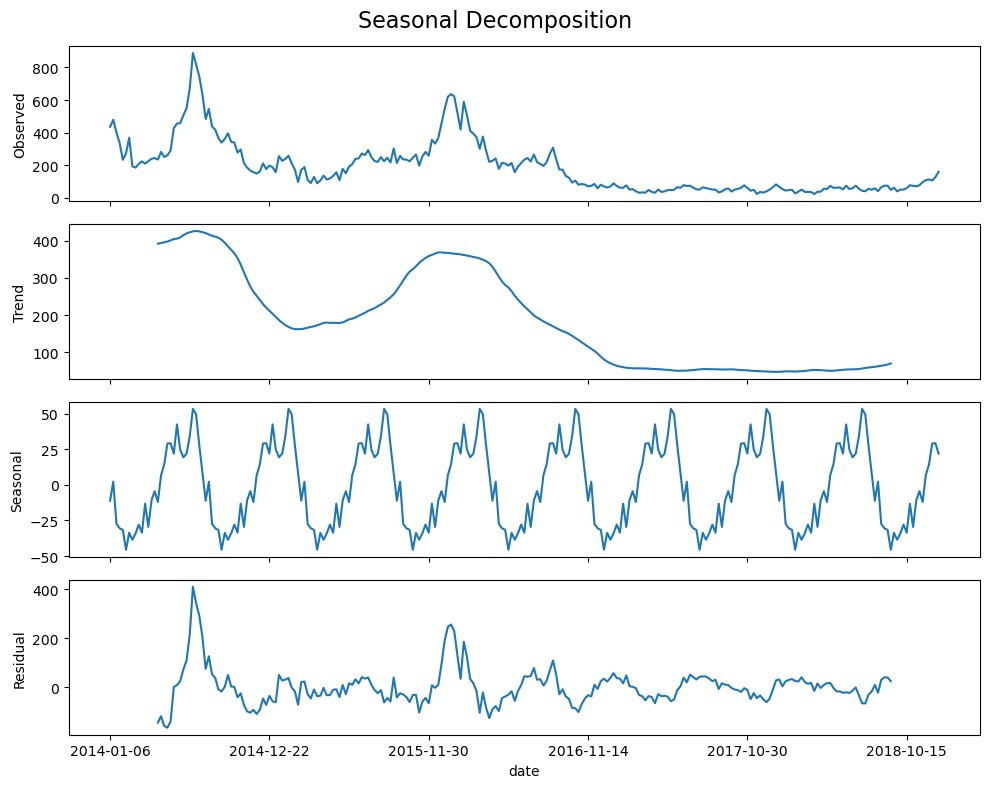

In [26]:
# Create a subplots figure with three panels
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

# Plot each component in a separate panel
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

# Add a title and adjust the layout
fig.suptitle('Seasonal Decomposition', fontsize=16)
plt.tight_layout()

### <span style="color:red">Seasonal Decompose Analysis</span>

The Seasonal Decomposition plots tell us:
- From Observed, we can see there are 2 spikes in Dengues cases. One is between Jul-Aug 2014, and the other is the beginning of the 2016.
- From Trends, we can see there is a downward trend in the number of Dengue cases from 2014 till 2018.
- From Seasonal, we can see the seasonal pattern of Dengue cases is 6 months or 26 weeks.
- From Residual, we can see the spike in residual corresponds to the spike in the Dengue cases from Observed.The Residual do not have a constant mean and variance over time.

Hence, we can deduced that the Dengue cases are seasonal in nature and the data is not stationary as inferred from the Residual plot not having constant mean and variance over time.

## Dickey-Fuller Test

### Original Dengue Weather Google Dataset

In [27]:
# Apply Dickey-Fuller test original dataset
result = adfuller(dengue_weather_google['number'])

# Print test statistic, p-value, and critical values
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for k, v in result[4].items():
    print(f'   {k}: {v}')

Test statistic: -2.448846919251793
p-value: 0.12842146204596144
Critical values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


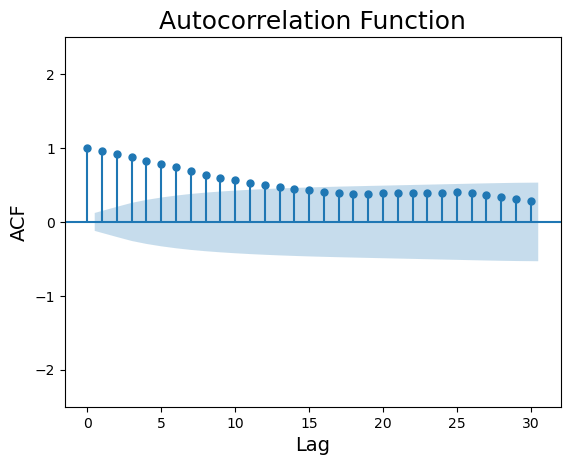

In [28]:
# Plot the ACF
plot_acf(dengue_weather_google['number'], lags=30)
plt.title('Autocorrelation Function', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plt.ylim(-2.5,2.5)
plt.show();

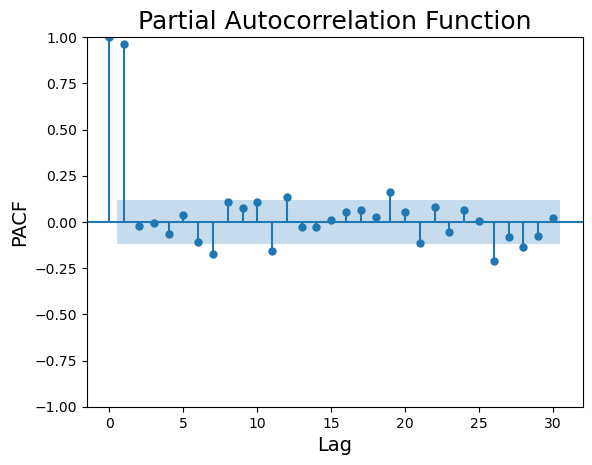

In [29]:
# Plot the PACF 
plot_pacf(dengue_weather_google['number'], lags=30)
plt.title('Partial Autocorrelation Function', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.ylim(-1,1)
plt.show();

### <span style="color:red">Original Dataset Analysis</span>

From the Dickey-Fuller test, we can see that:
- The test statistic is a negative value and is more negative than the critical values at the 5% and 10% levels, but not at the 1% level.
- The p-value is greater than 0.05 (assuming a significance level of 5%), which indicates weak evidence against the null hypothesis of non-stationarity.

Therefore, based on these results, we cannot reject the null hypothesis that the time series is non-stationary. In other words, there is not enough evidence to suggest that the time series is stationary.

The ACF plot shows a slow decay or a cycle, and both the ACF and PACF plots has many significant lags, this suggests that the time series is non-stationary. This pattern indicates that the autocorrelations are strong and do not decay quickly, and there are significant autocorrelations at many lags. The timeseries do not have a constant mean and variance, and their correlatiosn depend on time.

### 1st Differencing Dengue Weather Google Dataset

In [30]:
# applying first difference to dengue_weather_google_diff
dengue_weather_google_diff=dengue_weather_google.diff()


In [31]:
dengue_weather_google_diff.dropna(inplace=True)

In [32]:
# Apply Dickey-Fuller test to 'Dengue' column after 1st difference
result = adfuller(dengue_weather_google_diff['number'])

# Print test statistic, p-value, and critical values
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for k, v in result[4].items():
    print(f'   {k}: {v}')

Test statistic: -5.371381207301823
p-value: 3.888959157105094e-06
Critical values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876


Analysis: After 1st differencing, the differenced data set is stationary.

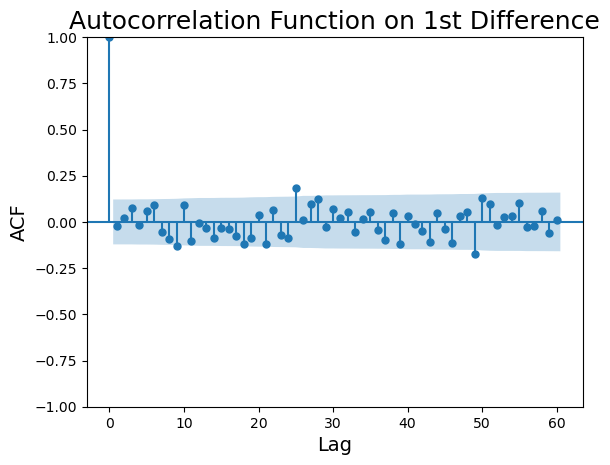

In [33]:
# Plot the ACF after 1st Difference
plot_acf(dengue_weather_google_diff['number'], lags=60)
plt.title('Autocorrelation Function on 1st Difference', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plt.ylim(-1,1)
plt.show();

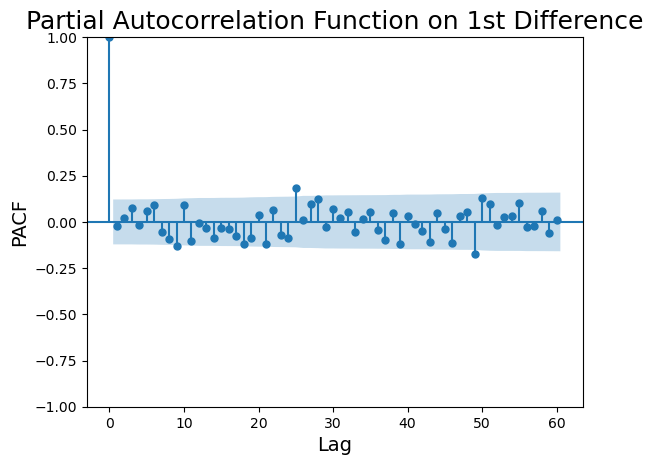

In [34]:
# Plot the PACF after 1st Difference
plot_acf(dengue_weather_google_diff['number'], lags=60)
plt.title('Partial Autocorrelation Function on 1st Difference', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.ylim(-1,1)
plt.show();

### <span style="color:red">1st Differenced Dataset Analysis</span>

From the Dickey-Fuller test, we can see that:
- The test statistic is a negative value, which is more negative than the critical values at the 1%, 5%, and 10% levels. 
- The  p-value is very small, which suggests strong evidence against the null hypothesis of non-stationarity.

Therefore, based on these results, we can reject the null hypothesis that the time series is non-stationary. In other words, there is enough evidence to suggest that the time series is stationary.

If the ACF plot of a time series shows a gradual decay to zero and the PACF plot has a sharp drop-off after a certain lag, this suggests that the time series is stationary. This pattern indicates that the autocorrelations are small and decay quickly, and there are no significant autocorrelations beyond a certain lag.

### <span style="color:red">Conclusions</span>

- Sarimax model needs to be deployed as we know there is a seasonal aspect to the Dengue time-series data.
- 1st differencing will ensure the time-series data to be stationary, so we know the non-seasonal d=1.
- From the ACF plot, we know there is a sharp drop in value at lag=1, so we can infer non-seasonal q=0 or 1.
- From the PACF plot, we also know there is a sharp dop in value at lag=1, so we can also infer non-seasonal p=0 or 1.

Next we proceed to do SARIMAX model with all the factors mentioned above in mind.